In [1]:
from google.colab import drive #Digunakan untuk mengakses Google Drive dari Google Colab.
import pandas as pd #digunakan untuk manipulasi dan analisis data.
from sklearn.preprocessing import StandardScaler #digunakan untuk menskalakan fitur numerik dalam data Anda agar memiliki mean 0 dan standar deviasi 1.
from sklearn.cluster import KMeans, AgglomerativeClustering #digunakan untuk mengelompokkan data ke dalam cluster berdasarkan kesamaan.
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score #digunakan untuk mengevaluasi kualitas cluster yang dihasilkan oleh algoritma clustering.
import matplotlib.pyplot as plt #digunakan untuk membuat visualisasi data, seperti plot dan grafik.
from scipy.spatial.distance import cdist #digunakan untuk menghitung jarak antara setiap pasangan titik dalam dua kumpulan data.
import numpy as np ##Library ini menyediakan fungsi-fungsi untuk melakukan operasi matematika dan numerik pada array multidimensi.

In [11]:
data = pd.read_csv('/content/Online Retail.csv')
#membaca data

In [12]:
data.head()
#menampilkan 5 baris pertama dari DataFrame Pandas yang disimpan dalam variabel data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
chunk_size = 5000
#membaca data dalam chunks

In [10]:
data_list = []
#menampung hasil chunk yang telah diproses

In [13]:
chunk_size = 5000
data_list = []
for chunk in pd.read_csv('/content/Online Retail.csv', chunksize=chunk_size):
    data_list.append(chunk)
#membaca data dalam chunks

data = pd.concat(data_list, ignore_index=True)
#menggabungkan data dari chunks

In [14]:
data = pd.concat(data_list, axis=0)
#menggabungkan chunks menjadi satu DataFrame yang lebih kecil

In [15]:
data_sampled = data.sample(frac=0.05, random_state=0)
#mengambil sampel untuk mengurangi ukuran

In [16]:
numeric_features = data_sampled.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled[numeric_features])
#standarisasi data numerik yang disampled

data_scaled = pd.DataFrame(data_scaled, columns=numeric_features, index=data_sampled.index)
#membuat DataFrame baru dengan data yang telah distandarisasi

data_scaled = pd.concat([data_scaled, data_sampled.drop(columns=numeric_features)], axis=1)
#menggabungkan kembali kolom non-numerik (jika diperlukan)

In [18]:
!pip install scikit-learn #untuk menginstal library scikit-learn, yang berisi berbagai tools untuk machine learning, termasuk algoritma clustering.
from sklearn.cluster import MiniBatchKMeans #digunakan untuk membuat dan melatih model clustering Mini-Batch K-Means.

numeric_features = data_sampled.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop('CustomerID', errors='ignore')
#standarisasi data numerik yang disampled

minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
minibatch_labels = minibatch_kmeans.fit_predict(data_scaled[numeric_features])
#menerapkan MiniBatchKMeans pada data yang sudah disampled dan distandarisasi

In [19]:
minibatch_silhouette = silhouette_score(data_scaled[numeric_features], minibatch_labels)
print("MiniBatchKMeans Silhouette Score:", minibatch_silhouette)
#menghitung Silhouette Score

MiniBatchKMeans Silhouette Score: 0.4592443871304266


In [20]:
chunk_size = 5000
data_list = []
for chunk in pd.read_csv('/content/Online Retail.csv', chunksize=chunk_size):
    chunk = chunk[['Quantity', 'UnitPrice']].dropna()
    data_list.append(chunk)
#membaca data dalam chunks

In [21]:
data = pd.concat(data_list, axis=0)
data_sampled = data.sample(frac=0.05, random_state=0)
#mmengumpulkan dan mengambil sampel untuk mengurangi ukuran

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)
#standarisasi data

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)
#K-Means clustering

kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(data_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(data_scaled, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Score:", kmeans_davies)
print("K-Means Calinski-Harabasz Score:", kmeans_calinski)
#menghitung nilai Silhouette dan Davies-Bouldin untuk KMeans

K-Means Silhouette Score: 0.9978624351091656
K-Means Davies-Bouldin Score: 0.22063081786396274
K-Means Calinski-Harabasz Score: 51089.50160800418


In [25]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)
#Agglomerative clustering

agglo_silhouette = silhouette_score(data_scaled, agglo_labels)
agglo_davies = davies_bouldin_score(data_scaled, agglo_labels)
agglo_calinski = calinski_harabasz_score(data_scaled, agglo_labels)

print("Agglomerative Clustering Silhouette Score:", agglo_silhouette)
print("Agglomerative Clustering Davies-Bouldin Score:", agglo_davies)
print("Agglomerative Clustering Calinski-Harabasz Score:", agglo_calinski)
#menghitung nilai Silhouette dan Davies-Bouldin untuk Agglomerative Clustering

Agglomerative Clustering Silhouette Score: 0.9971904524512569
Agglomerative Clustering Davies-Bouldin Score: 0.3056782878234072
Agglomerative Clustering Calinski-Harabasz Score: 62288.64900019258


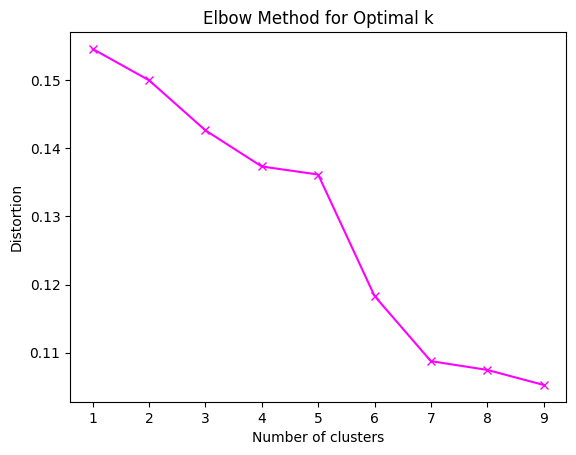

In [26]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(sum(np.min(cdist(data_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

plt.plot(K, distortions, color='magenta', marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()
#menghitung distortions untuk menentukan nilai k optimal